
## Multi-Class (Categorical) CNN with Image Preprocessing and Augmentation and Dense Dropouts.

Courser Colab Link: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb

Rock, Paper, Scissors Dataset: http://www.laurencemoroney.com/rock-paper-scissors-dataset/

In [1]:
# Downloading the dataset:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-03-21 16:19:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   129MB/s    in 1.5s    

2020-03-21 16:19:25 (129 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-03-21 16:19:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps

In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
os.chdir('/tmp/')
os.getcwd()
print(os.listdir(os.getcwd()))
print(os.listdir('/tmp/rps/'))
print(os.listdir('/tmp/rps-test-set/'))

['rps-test-set', 'rps-test-set.zip', 'rps', 'rps.zip']
['scissors', 'rock', 'paper']
['scissors', 'rock', 'paper']


In [4]:
rock_dir = os.path.join('/tmp/rps','rock')
paper_dir = os.path.join('/tmp/rps','paper')
scissors_dir = os.path.join('/tmp/rps','scissors')

rock_files = os.listdir(rock_dir)
print(len(rock_files))

paper_files = os.listdir(paper_dir)
print(len(paper_files))

scissors_files = os.listdir(scissors_dir)
print(len(scissors_files))



840
840
840


(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)


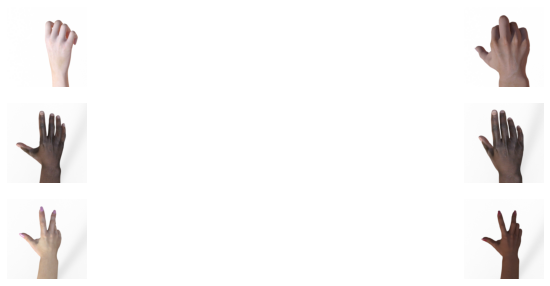

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

plt.figure(figsize=(15,5))
for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  plt.subplot(3,2,i+1)
  img = mpimg.imread(img_path)
  print(img.shape)
  # img.resize((np.array(img.size)*2).astype(int))
  # print(img.shape)
  # img.reshape(600, 600, 4)
  # print(img.shape)
  plt.imshow(img)
  plt.axis('Off')

plt.show()

In [6]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


# Image Processing Generator

img_size = 150


train_dir = '/tmp/rps/'

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_dir = '/tmp/rps-test-set/'

val_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=10,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=1,
    class_mode='categorical'
)

TensorFlow 2.x selected.
2.1.0
Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [26]:
# CNN

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(12, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(12, (3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(24, (3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(1024, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(1, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 12)      336       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 12)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 12)        1308      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 12)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 24)        2616      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 24)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6936)             

In [0]:
# CNN compiler

from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(lr=0.001),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
# CNN training

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    targ = 0.99
    if logs['accuracy']>targ :
      print('Reached %0.1f%% training accuracy. Training converged and stopping!' %(targ*100))
      self.model.stop_training = True

callback=myCallback()


history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.n//train_generator.batch_size,
    epochs=30,
    validation_data = val_generator,
    validation_steps= val_generator.n//val_generator.batch_size,
    callbacks=[callback],
    verbose=1
)

model.save('rps.h5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 252 steps, validate for 372 steps
Epoch 1/30
252/252 [==============================] - 72s 284ms/step - loss: 0.9359 - accuracy: 0.7165 - val_loss: 0.5640 - val_accuracy: 0.8324
Epoch 2/30
252/252 [==============================] - 71s 282ms/step - loss: 0.7005 - accuracy: 0.7901 - val_loss: 0.3548 - val_accuracy: 0.9131
Epoch 3/30
252/252 [==============================] - 71s 283ms/step - loss: 0.5466 - accuracy: 0.8455 - val_loss: 0.1969 - val_accuracy: 0.9471
Epoch 4/30
252/252 [==============================] - 72s 285ms/step - loss: 0.4328 - accuracy: 0.8837 - val_loss: 0.3495 - val_accuracy: 0.8943
Epoch 5/30
252/252 [==============================] - 72s 285ms/step - loss: 0.3767 - accuracy: 0.9054 - val_loss: 0.2475 - val_accuracy: 0.9247
Epoch 6/30
252/252 [==============================] - 72s 285ms/step - loss: 0.3060 - accuracy: 0.9234 - val_loss: 0.0616 - val_accuracy: 0.9892
Epoch 7/30
252/252 [================

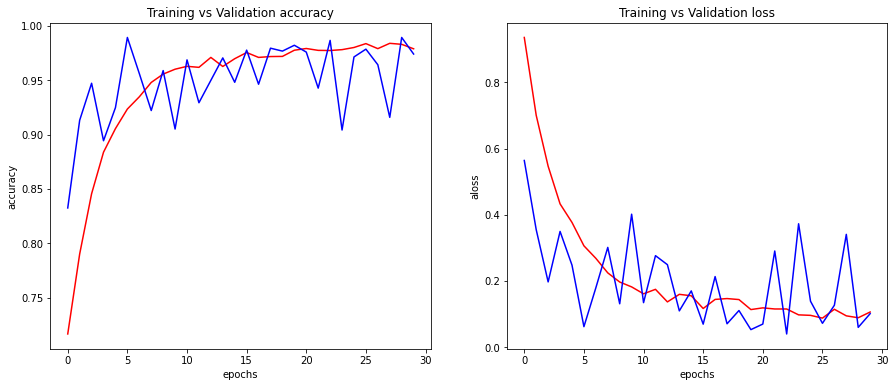

In [30]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']


plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(acc, 'r', label='training accuracy')
plt.plot(val_acc, 'b', label='validation accuracy')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training vs Validation accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(loss, 'r', label='training loss')
plt.plot(val_loss, 'b', label='validation loss')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('aloss')
plt.title('Training vs Validation loss')
plt.grid()

plt.show()

In [34]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print('\n- Chosen image: %s' %fn)
  # print(classes)
  classes_label = ['paper', 'rock', 'scissors']
  print('- CNN prediction: %s' %classes_label[np.argmax(classes)])

Saving paper1.png to paper1 (3).png
Saving paper3.png to paper3 (3).png
Saving paper4.png to paper4 (2).png
Saving rock7.png to rock7 (4).png
Saving scissors8.png to scissors8 (3).png

- Chosen image: paper1.png
- CNN prediction: paper

- Chosen image: paper3.png
- CNN prediction: paper

- Chosen image: paper4.png
- CNN prediction: paper

- Chosen image: rock7.png
- CNN prediction: rock

- Chosen image: scissors8.png
- CNN prediction: scissors
